# CNN(Convolutional Neural Network) 모델
- CNN은 합성곱 신경망으로 불리며, 컴퓨터 비전 분야에서 사용되는 대표적인 딥러닝 모델이다.
- 특히 자율 주행 자동차 및 안면인식 등 이미지를 판별해야 하는 분야에서 많이 사용된다.
# 합성곱과 풀링
- 합성곱 연산은 필터로 불리는 특정 크기의 행렬을 이미지 데이터나 문장 데이터 행렬에 슬라이싱 하면서 곱하고 더하는 연산을 의미한다.
- 여기서 합성곱 필터는 경우에 따라 마스크, 윈도우, 커널 등 다양하게 불린다.


## 풀링 ##


- 풀링 연산이란 합성곱 연산 결과로 나온 특징 맵의 크기를 줄이거나 주요한 특징을 추출하기 위해 사용하는 연산이다.
- 풀링 연산에는 최대 풀링과 평균 풀링 연산이 있다.
- 주로 최대 풀링 연산을 사용한다.
- 풀링 연산에는 필터보다는 윈도우라는 용어를 많이 사용하고, 스트라이드, 패딩 개념이 동일하게 적용된다.

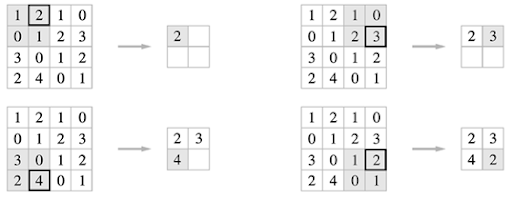


## 챗봇 문답 감정 분류 모델 ##


- CNN의 경우 이미지 분류 외에 임베딩 품질만 괜찮다면 자연어 분류에도 좋은 성능을 보인다.
- 컴퓨터 입장에서는 이미지든 임베딩 처리된 자연어든 벡터로 표현 가능한 대상이면 특징을 뽑아내도록 학습할 수 있다.


In [22]:
# 모듈 임포트 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import (
    Input,
    Embedding,
    Dense,
    Dropout,
    Conv1D,
    GlobalMaxPool1D,
    concatenate,
)

# Input
# 역할: 모델의 입력 데이터를 정의하는 레이어.
# 사용 방법: 입력 데이터의 형태를 지정.


# Embedding
# 역할: 정수로 인코딩된 단어를 밀집된 벡터 표현(embedding vector)으로 변환.
# 용도: 주로 자연어 처리(NLP) 모델에서 단어를 표현하는 데 사용.


# Dense
# 역할: 완전 연결(fully connected) 레이어로, 입력 데이터를 가중치와 편향을 통해 변환.
# 용도: 모델의 출력층 또는 은닉층으로 사용.


# Dropout
# 역할: 과적합(overfitting)을 방지하기 위해 특정 비율의 노드를 랜덤하게 비활성화.
# 용도: 모델의 일반화 성능을 높이기 위해 사용


# Conv1D
# 역할: 1차원 데이터를 처리하는 합성곱(convolution) 레이어.
# 용도: 텍스트, 시계열 데이터와 같은 1D 데이터를 처리하는 데 사용.


# GlobalMaxPool1D
# 역할: 1D 텐서에서 가장 큰 값(max value)을 선택하여 데이터 차원을 축소.
# 용도: 시계열 데이터 또는 텍스트 처리에서 중요한 특징만 추출하는 데 사용.


# concatenate
# 역할: 여러 레이어의 출력을 결합(병합).
# 용도: 병렬 네트워크나 멀티-인풋 모델에서 사용


In [23]:
# 데이터 로드 
train_file = 'chatbot_data.csv'

data = pd.read_csv(train_file, delimiter= ',')

data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [25]:
# 질문과 감정을 리스트 형태로 반환 
features = data['Q'].tolist()
labels = data['label'].tolist()

print(features[1], labels[1])

1지망 학교 떨어졌어 0


In [27]:
# 토크나이저 예시

from tensorflow.keras.preprocessing.text import  Tokenizer

# 데이터 
texts = [" I love deep learning", " Deep learning is amazing wow", " si gong zoa"]

# 토크나이저 초기화 
tokenizer = Tokenizer(num_words=10) # 최대 단어 개수를 10개로 제한 
tokenizer.fit_on_texts(texts)

# 결과확인 
print(tokenizer.word_index)

# 가장 많이 등장한 단어가 앞 인덱스로 할당 

{'deep': 1, 'learning': 2, 'i': 3, 'love': 4, 'is': 5, 'amazing': 6, 'wow': 7, 'si': 8, 'gong': 9, 'zoa': 10}


In [29]:
# 단어 인덱스 시퀀스 벡터


# 질문 리스트(features)에서 문장을 하나씩 꺼내와 text_to_word_seqence() 함수를 이용해 단어 시퀀스를 만든다.
# 단어 시퀀스란 단어 토큰들의 순차적 리스트를 말한다.
# 예를 들어 '3박4일 놀러가고 싶다' 문장의 단어 시퀀스는
# ['3박4일', '놀러가고', '싶다']가 된다.
# 이렇게 생성된 시퀀스를 말뭉치(corpus) 리스트에 저장한다.
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]

# 토크아니징
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

대충 제로 패딩 하는 이미지 


In [32]:
# 시퀀스 번호로 만든 벡터는 문제가 있다.
# 문장의 길이가 제각각이기 때문에 벡터 크기가 다 다르다.
# 하지만 CNN 모델의 입력 계층은 고정된 개수의 입력 노드를 가지고 있다.
# 따라서 시퀀스 번호로 변환된 전체 벡터 크기를 동일하게 맞춰야 한다.
# 여기서 사용할 수 있는 클래스가 MAX_SEQ_LEN이다.
# MAX_SEQ_LEN 크기보다 작은 벡터에는 남는 공간이 생기는데 이를 0으로 채우는 작업을 한다.
# 이를 패딩 처리라 하고, 케라스에서는 pad_sequences() 함수를 이용한다.

# maxlen 파라미터로 시퀀스의 최대 길이를 정한다.
# 학습 시킬 문장 데이터들을 사전에 분석해 최대 몇 개의 단어 토큰으로 구성되어 있는지 파악한다.
# 너무 크게 잡으면 빈 공간이 많이 생겨 자원이 낭비되고, 작게 잡으면 입력 데이터가 손실된다.

MAX_SEQ_LEN = 15

padded_seqs = preprocessing.sequence.pad_sequences(
    sequences, maxlen=MAX_SEQ_LEN, padding="post"
)


In [33]:
# 패딩 처리된 시퀀스(padded_seqs) 벡터 리스트와 감정(labels) 리스트 전체를 데이터셋 객체로 만든다.
# 이후 데이터를 랜덤으로 섞은 후 학습용, 검증용, 테스트용 데이터셋을 7:2:1로 나눈다

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)


In [36]:
# 문장을 감정 클래스로 분류하는 CNN 모델은 전처리된 입력 데이터를 단어 임베딩 처리하는 영역과
# 합성곱 필터와 연산을 통해 문장의 특징정보(특징맵)를 추출하는 영역,
# 평탄화를 하는 영역, 그리고 완전연결 계층을 통해 감정별로 클래스를 분류하는 영역으로 구성
# cnn_model_block.drawio 참조


# 입력 계층은 케라스의 Input() 함수로 생성한다.
# 이때 shape 인자로 입력 노드에 들어올 데이터의 형상을 지정한다.
# 실제 패딩 처리된 시퀀스 벡터의 크기(MAX_SEQ_LEN)로 설정
# 임베딩 계층을 만든다.
# 단어별로 패딩 처리된 시퀀스 벡터는 희소 벡터다.
# 임베딩 계층은 희소 벡터를 입력받아 데이터 손실을 최소화하면서 벡터 차원이 압축되는 밀집 벡터로 변환한다.
# 단어 개수(VOCAB_SIZE)와 임베딩 결과로 나올 밀집 벡터 크기(EMB_SIZE), 입력되는 시퀀스 벡터 크기(MAX_SEQ_LEN)를
# Embedding()의 인자로 사용해 임베딩 계층을 생성한다.
# 단어 임베딩 부분의 마지막에는 50%의 확률로 Dropout을 생성한다.
# 이를 통해 학습 과정에서 발생할 과적합을 대비한다.

# 드랍아웃으로 과적합 방지 

# 하이퍼 파라미터 설정 
dropout_prob =0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1 # 전체 단어 수 

input_layer = Input(shape=(MAX_SEQ_LEN,))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

C:\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
# 임베딩 계층을 통해 전달된 임베딩 벡터에서 특징 추출을 담당하는 영역을 구현
# Conv1D()를 이용해 크기가 3, 4, 5인 합성곱 필터를 128개씩 사용한 합성곱 계층을 3개 생성
# 합성곱 연산 과정에 따라 필터 크기에 맞게 입력 데이터 위를 슬라이딩 하게 되는데,
# 이는 3, 4, 5-gram 언어 모델의 개념과 유사
# 임베딩 벡터를 합성곱 계층의 입력으로 받아 GlobalMaxPool1D()를 이용해 풀링 연산
# 완전 연결 계층에 전달될 수 있도록 concatenate()를 이용해 병렬로 처리된 합성곱 계층의 특징맵 결과를 묶는다

conv1 = Conv1D(filters=128, kernel_size=3, padding="valid", activation=tf.nn.relu)(
    dropout_emb
)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(filters=128, kernel_size=4, padding="valid", activation=tf.nn.relu)(
    dropout_emb
)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(filters=128, kernel_size=5, padding="valid", activation=tf.nn.relu)(
    dropout_emb
)
pool3 = GlobalMaxPool1D()(conv3)

# 풀링층을 합친다 
concat = concatenate([pool1, pool2, pool3])


In [38]:
# 완전 연결 계층 구현
# Dense()를 이용해 128개의 출력 노드를 가지고, relu 활성화 함수를 사용하는 계층 생성
# Dense() 계층은 이전 계층에서 합성곱 연산과 맥스 풀링으로 나온 3개의 특징맵 데이터를 입력으로 받는다.
# 로드한 데이터 문장에서 3가지 클래스로 감정을 분류해야 하기 때문에 출력 노드 3개를 생성한다.
# 계층에서 결과로 나온 값(logits)을 점수라 부른다.
# 여기서는 3개의 점수가 출력되는데, 가장 큰 점수를 가진 노드 위치가 CNN 모델이 예측한 결과가 된다

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)

In [39]:
#logits에서 나온 점수를 소프트맥스 계층을 통해 감정 클래스별 확률 계산 
predictions = Dense(3, activation=tf.nn.softmax)(logits)

In [40]:
# 케라스 모델을 생성할 때 Model()을 사용하는데,
# 인자로는 앞서 생성한 입력계층과 출력계층을 사용한다.
# 모델 정의 후 실제 모델을 model.compile() 함수를 통해 CNN 모델을 컴파일 한다.
# 최적화 방법에는 adam을, 손실 함수에는 sparse_categorical_crossentropy를 사용한다.
# 모델을 평가할 때 정확도를 생성한다.

model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [41]:
# 모델 학습 
# 인자로 학습용 데이터셋을 입력, validation_data로 검증용 데이터셋 입력 
# 5회 반복 

model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

Epoch 1/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5063 - loss: 0.9724 - val_accuracy: 0.7944 - val_loss: 0.5614
Epoch 2/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7842 - loss: 0.5427 - val_accuracy: 0.9065 - val_loss: 0.2827
Epoch 3/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9015 - loss: 0.3014 - val_accuracy: 0.9535 - val_loss: 0.1618
Epoch 4/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9417 - loss: 0.1824 - val_accuracy: 0.9695 - val_loss: 0.0980
Epoch 5/5
414/414 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9637 - loss: 0.1148 - val_accuracy: 0.9810 - val_loss: 0.0627


In [42]:
# 모델 파일 추출 
model.save('cnn_model.keras')

In [ ]:
from tensorflow.keras import preprocessing

# 데이터 로드
train_file = "chatbot_data.csv"

data = pd.read_csv(train_file, delimiter=",")

# data.head()


# 질문과 감정을 리스트 형태로 반환
features = data["Q"].tolist()
labels = data["label"].tolist()

print(features[:2], labels[:2])



['12시 땡!', '1지망 학교 떨어졌어'] [0, 0]


In [45]:
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]

# 토크아니징
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

padded_seqs = preprocessing.sequence.pad_sequences(
    sequences, maxlen=MAX_SEQ_LEN, padding="post"
)

In [46]:
# 데이터를 랜덤으로 섞은후에 테스트용 데이터셋 2000개를 뽑아서 20개씩 배치처리 
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20)

In [47]:
# 모델 평가 
model.evaluate(test_ds)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.0667


[0.06148364394903183, 0.9800000190734863]

In [48]:
# 10212번쨰 문장을 샘플로 하고 실재값 출력 
# 문장 분류가 라벨인 이유?
print('단어:', corpus[10212])
print('단어 인덱스:', padded_seqs[10212])
print('문장 분류:', labels[10212])

단어: ['썸', '타는', '여자가', '남사친', '만나러', '간다는데', '뭐라', '해']
단어 인덱스: [   13    61   127  4320  1333 12162   856    31     0     0     0     0
     0     0     0]
문장 분류: 2


In [52]:
picks = [10212]
predict = model.predict(padded_seqs[picks])
predicted_classes = tf.math.argmax(predict, axis=1)

print('감정 예측 점수' , predict)
print('감정 예측 클래스' ,predicted_classes.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
감정 예측 점수 [[1.9935182e-07 3.5464942e-07 9.9999940e-01]]
감정 예측 클래스 [2]
